<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/2024%EC%88%98%ED%96%89%EC%97%B0%EC%8A%B5_%ED%8C%A8%EC%85%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98(%EC%B0%B8%EA%B3%A0%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[주제1] 패션 이미지 분류 (난이도 낮음)**
---

<img src='https://drive.google.com/uc?id=1ftz5VlckDuMvlVVUhJeI2kuA9QMHPEMu' width=850>

---

## **0. 필요한 모듈 가져오기**
라이브러리 및 모듈은 이 곳에서 한 번에 가져와도 되고 필요한 셀에서 바로 추가해도 됩니다.

In [ ]:
import numpy as np
import pandas as pd

## **1. 데이터 가져오기**
아래 코드를 실행하여 데이터를 읽어오세요. (변수명은 원한다면 변경해도 됩니다.)

In [ ]:
# 데이터 가져오기
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


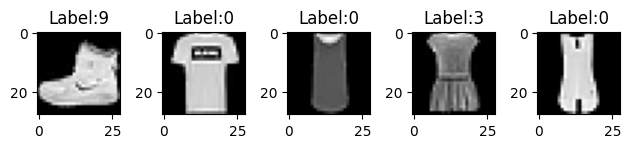

In [ ]:
# 다섯 개(0번~4번)의 데이터 샘플 이미지와 레이블 출력하기
import matplotlib.pyplot as plt
for n in range(0, 5):
  plt.subplot(1, 5, n+1) # (columns, rows, index)
  plt.imshow(x_train[n], cmap=plt.cm.gray)
  plt.title('Label:' + str(y_train[n]))
plt.tight_layout()
plt.show()

##**2. 데이터 준비 및 분석하기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제1) 데이터 탐색 <br>
    - 데이터 형태 확인,차원확인,샘플이미지와 레이블 출력
- (과제2) 데이터 전처리
    - 데이터 형태 변형,데이터정규화,원-핫인코딩

In [ ]:
# (과제1-1) 데이터탐색 (데이터 형태 확인,차원확인)
print('데이터 형태', x_train.shape, y_train.shape)
print('테스트 데이터 형태', x_test.shape, y_test.shape)
print('데이터 차원', x_train.ndim, y_train.ndim)
print('테스트 데이터 차원', x_test.ndim, y_test.ndim)

데이터 형태 (60000, 28, 28) (60000,)
테스트 데이터 형태 (10000, 28, 28) (10000,)
데이터 차원 3 1
테스트 데이터 차원 3 1


In [ ]:
# (과제2-1) 데이터 전처리 (데이터 형태 변형, 데이터정규화)
# 흑백 (28, 28) / 컬러 (28, 28, 3)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# (과제2-2) 데이터 전처리 (원-핫인코딩)
#from keras import utils
#y_train = utils.to_categorical(y_train)
#y_test = utils.to_categorical(y_test)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##**3. 모델 학습시키기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제3) 신경망 모델 생성 (신경망 구조,레이어 추가)
- (과제4) 신경망 모델 학습 (학습방식설정 및 학습)<br>

In [ ]:
# (과제3) 신경망 모델생성 (신경망 구조,레이어 추가)
from keras.models import Sequential # 신경망 모델 클래스
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential() # 신경망 객체 생성
model.add(Input(shape=(28, 28, 1))) # 입력
model.add(Conv2D(filters = 32, kernel_size=(2, 2), strides=(1, 1), padding='same')) # 합성곱층
model.add(MaxPooling2D(pool_size=(2, 2))) # 풀링층
model.add(Flatten()) # 차원변경
model.add(Dense(512, activation='relu')) # 은닉층 (relu, sigmoid)
model.add(Dense(10, activation='softmax')) # 출력층 (클래스 개수에 맞게 노드 수 10, 다중클래스분류에 적합한 소프트맥스)

In [ ]:
# 요약정보 확인하기
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,217,066 (12.27 MB)

 Trainable params: 3,217,066 (12.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# (과제4) 신경망 모델학습  (학습방식설정 및 학습)
# loss: 손실함수(얼마나 못하는지 측정), optimizer: 옵티마이저(학습 수행 방법), metrics: 성능평가척도(성적 산출법)
model.compile(loss = 'categorical_crossentropy', # 범주형 크로스엔트로피
              optimizer = 'SGD', # 확률적 경사하강법
              metrics = ['accuracy']) # 정확도
model.fit(x_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5781 - loss: 1.4671
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8030 - loss: 0.5699
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8276 - loss: 0.4930
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8380 - loss: 0.4653
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8467 - loss: 0.4351
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8592 - loss: 0.4078
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8584 - loss: 0.4035
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8644 - loss: 0.3899
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8667 - loss: 0.3813
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8696 - loss: 0.3758


##**4. 모델 평가하기**
문제 상황에 맞게 아래 작업을 수행하세요.
- (과제5) 모델 성능 평가: 손실값과 정확도 출력

In [ ]:
# (과제5) 모델성능평가하기
loss, accuracy = model.evaluate(x_test, y_test)
print('손실은', loss, '입니다.')
print('정확도는', accuracy, '입니다.')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3959
손실은 0.4060598909854889 입니다.
정확도는 0.8568999767303467 입니다.


##**5. 모델 활용하기**
문제 상황에 맞게 <u>아래 작업 중 하나 이상</u>을 수행하세요.
- (과제6) 테스트 데이터의 분류 결과 확인
- (선택과제) 새로운 데이터의 분류 결과 확인<br>
※ 새로운 데이터는 업로드된 0~9.png 파일을 이용하거나, 웹에서 구한 이미지를 가공하여 사용

In [ ]:
# (과제6)테스트데이터(X_test[n]  의 분류 결과 확인하기)
# model.predict(x_test[0].reshape((1, 28, 28, 1))) # x_test[0].shape ---> (28, 28, 1)
y_prob = model.predict(x_test[0].reshape((1, 28, 28, 1)))
y_pred= y_prob.argmax(axis=-1) # 배열 내 최대값의 인덱스 반환
print("이 의류는", y_pred,"번 클래스입니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
이 의류는 [9] 번 클래스입니다.


In [ ]:
# n 번째 샘플 이미지와 레이블 출력하기
n = 10
import matplotlib.pyplot as plt
plt.title("label:"+str( y_train[n]) )
plt.imshow(x_test[n], cmap=plt.cm.gray)
plt.show()

※ 아래는 이미지 파일을 업로드하고 넘파이 배열(image)로 읽어오는 코드입니다.<br>
필요한 경우 실행하여 활용하세요.

In [ ]:
# 파일 업로드하기
from google.colab import files
uploaded = files.upload()

In [ ]:
# 이미지를 회색조로 변환하기
import cv2
image = cv2.imread('파일명.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [ ]:
# 이미지 출력하기
plt.figure(figsize = (1, 1))
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [ ]:
# (선택과제) 분류 결과확인하기




